## Timeseries Data

Go over using Time Series MongoDB collections by scraping stock market data over the internet

##### Install Dependencies In Terminal (if you do not already have it)
```bash
pip install --user yfinance
pip install --user matplotlib
```

In [6]:
!pip install --user yfinance
#!pip install --user matplotlib

In [1]:
from pymongo import MongoClient

import pandas
import yfinance as yf
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

### Intro to yfinance

In [10]:
tickers = ["AMZN", "GOOGL"]
data = yf.download(tickers=tickers, period="1y", interval="1d")

[*********************100%***********************]  2 of 2 completed


In [12]:
print(type(data))
data[0:4]

<class 'pandas.core.frame.DataFrame'>


Adj Close                   Close                    High  \
                  AMZN       GOOGL        AMZN       GOOGL        AMZN   
Date                                                                     
2022-04-07  157.784500  135.888504  157.784500  135.888504  160.078995   
2022-04-08  154.460495  133.287506  154.460495  133.287506  157.368500   
2022-04-11  151.121994  128.823502  151.121994  128.823502  154.136505   
2022-04-12  150.787506  127.714500  150.787506  127.714500  155.098999   

                               Low                    Open              \
                 GOOGL        AMZN       GOOGL        AMZN       GOOGL   
Date                                                                     
2022-04-07  137.164505  154.511505  134.227493  158.399994  136.009995   
2022-04-08  135.669998  154.231003  132.965500  156.750000  135.583496   
2022-04-11  132.092499  150.534500  128.668503  152.712997  131.823502   
2022-04-12  131.600006  150.382996  126.789001  153.692505  131.600006   

              Volume            
                AMZN     GOOGL  
Date                            
2022-04-07  68136000  26234000  
2022-04-08  46002000  25142000  
2022-04-11  52112000  36884000  
2022-04-12  55178000  32710000

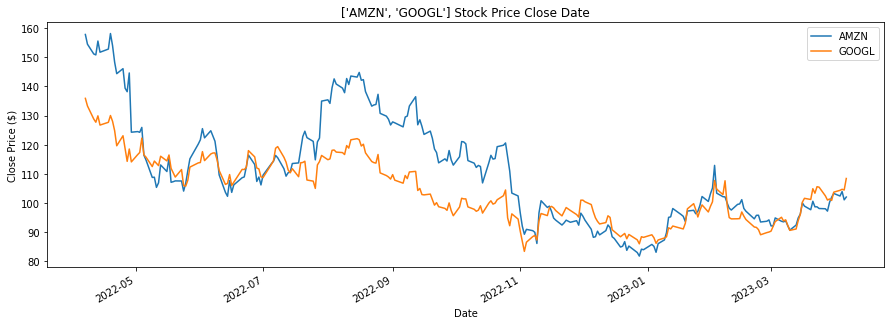

In [11]:
ax = data.plot(y="Close", figsize=(15,5), title=str(tickers)+ " Stock Price Close Date")
ax.set_ylabel("Close Price ($)")
None

### Converting yfinance dataframe to dict format for insertion

##### Swap the columns so the ticker names are the highest level column

In [13]:
data.columns = data.columns.swaplevel(0,1)
data[0:3]

,AMZN,GOOGL,AMZN,GOOGL,AMZN,GOOGL,AMZN,GOOGL,AMZN,GOOGL,AMZN,GOOGL
,Adj Close,Adj Close,Close,Close,High,High,Low,Low,Open,Open,Volume,Volume
Date,,,,,,,,,,,,
2022-04-07,157.784500,135.888504,157.784500,135.888504,160.078995,137.164505,154.511505,134.227493,158.399994,136.009995,68136000,26234000
2022-04-08,154.460495,133.287506,154.460495,133.287506,157.368500,135.669998,154.231003,132.965500,156.750000,135.583496,46002000,25142000
2022-04-11,151.121994,128.823502,151.121994,128.823502,154.136505,132.092499,150.534500,128.668503,152.712997,131.823502,52112000,36884000


In [14]:
data["AMZN"][0:3]

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2022-04-07,157.784500,157.784500,160.078995,154.511505,158.399994,68136000
2022-04-08,154.460495,154.460495,157.368500,154.231003,156.750000,46002000
2022-04-11,151.121994,151.121994,154.136505,150.534500,152.712997,52112000


##### Create an attribute an each entry that has the name of the ticker

In [15]:
for ticker in tickers:
    data.loc[:, (ticker, "Ticker")] = ticker

In [16]:
data["AMZN"][0:3]

,Adj Close,Close,High,Low,Open,Volume,Ticker
Date,,,,,,,
2022-04-07,157.784500,157.784500,160.078995,154.511505,158.399994,68136000,AMZN
2022-04-08,154.460495,154.460495,157.368500,154.231003,156.750000,46002000,AMZN
2022-04-11,151.121994,151.121994,154.136505,150.534500,152.712997,52112000,AMZN


##### Set date index to a column 

In [17]:
data["AMZN"].reset_index(level=0)[0:3]

,Date,Adj Close,Close,High,Low,Open,Volume,Ticker
0,2022-04-07,157.784500,157.784500,160.078995,154.511505,158.399994,68136000,AMZN
1,2022-04-08,154.460495,154.460495,157.368500,154.231003,156.750000,46002000,AMZN
2,2022-04-11,151.121994,151.121994,154.136505,150.534500,152.712997,52112000,AMZN


##### Convert the dataframe to an array of dictionaries 

In [18]:
data["AMZN"].reset_index(level=0)[0:3].to_dict('records')[0:3]

[{'Date': Timestamp('2022-04-07 00:00:00'),
  'Adj Close': 157.7845001220703,
  'Close': 157.7845001220703,
  'High': 160.07899475097656,
  'Low': 154.51150512695312,
  'Open': 158.39999389648438,
  'Volume': 68136000,
  'Ticker': 'AMZN'},
 {'Date': Timestamp('2022-04-08 00:00:00'),
  'Adj Close': 154.4604949951172,
  'Close': 154.4604949951172,
  'High': 157.36849975585938,
  'Low': 154.2310028076172,
  'Open': 156.75,
  'Volume': 46002000,
  'Ticker': 'AMZN'},
 {'Date': Timestamp('2022-04-11 00:00:00'),
  'Adj Close': 151.1219940185547,
  'Close': 151.1219940185547,
  'High': 154.13650512695312,
  'Low': 150.5345001220703,
  'Open': 152.71299743652344,
  'Volume': 52112000,
  'Ticker': 'AMZN'}]

### Connect To MongoDB instance

In [19]:
mongodb_uri = "mongodb://localhost:27017/"
db_name = "advanced_features"

In [20]:
client = MongoClient(mongodb_uri)
db = client[db_name]

### Creating  A Time-Series Collection

You could also use the compass app or mongoshell

In [21]:
db.create_collection("historical_stock_data", timeseries = {
    "timeField": "Date",
    "metaField": "Ticker",
    "granularity": "hours"
}, expireAfterSeconds = 60 * 60 * 24 * 365) #1 year

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'advanced_features'), 'historical_stock_data')

### Inserting The Time-Series Stock Data

##### Download the data

In [24]:
tickers = ["AMZN","META","GOOGL","MSFT","UDMY"]
data = yf.download(tickers=tickers, period="2y", interval="1d")

[*********************100%***********************]  5 of 5 completed


##### Process dataframe into list of dictionaries

In [25]:
stock_data_to_insert = []
data.columns = data.columns.swaplevel(0,1)

for ticker in tickers:
    data.loc[:, (ticker, "Ticker")] = ticker
    stock_data_to_insert.extend(data[ticker].reset_index(level=0).to_dict('records'))

In [26]:
stock_data_to_insert[0:2]

[{'Date': Timestamp('2021-04-07 00:00:00'),
  'Adj Close': 163.96949768066406,
  'Close': 163.96949768066406,
  'High': 165.1804962158203,
  'Low': 161.1824951171875,
  'Open': 161.69000244140625,
  'Volume': 66924000,
  'Ticker': 'AMZN'},
 {'Date': Timestamp('2021-04-08 00:00:00'),
  'Adj Close': 164.96499633789062,
  'Close': 164.96499633789062,
  'High': 166.22500610351562,
  'Low': 164.60000610351562,
  'Open': 165.5449981689453,
  'Volume': 56242000,
  'Ticker': 'AMZN'}]

##### Call insert_many() on time series collection

In [27]:
db.historical_stock_data.insert_many(stock_data_to_insert)

### Retrieving Time-Series Data

In [28]:
gt_date = datetime.now() - relativedelta(months=6)
gt_date

datetime.datetime(2022, 10, 9, 20, 40, 34, 321620)

In [29]:
ts_cursor = db.historical_stock_data.find({"Ticker": "META", "Date": {"$gte": gt_date}})

meta_price_data = list(ts_cursor)
meta_price_data[0:2]


[{'Date': datetime.datetime(2022, 10, 10, 0, 0),
  'Ticker': 'META',
  'Adj Close': 133.7899932861328,
  'Low': 131.8699951171875,
  'Open': 133.5500030517578,
  'Volume': 24024000,
  'High': 136.11000061035156,
  'Close': 133.7899932861328,
  '_id': ObjectId('643305dfd4c26cc5c5d19534')},
 {'Date': datetime.datetime(2022, 10, 11, 0, 0),
  'Ticker': 'META',
  'Adj Close': 128.5399932861328,
  'Low': 126.98999786376953,
  'Open': 131.6199951171875,
  'Volume': 38481400,
  'High': 132.66000366210938,
  'Close': 128.5399932861328,
  '_id': ObjectId('643305dfd4c26cc5c5d19535')}]

In [34]:
read_in_data = pandas.DataFrame(meta_price_data)
read_in_data = read_in_data.set_index("Date")
read_in_data = read_in_data.drop("_id", axis=1)
read_in_data

,Ticker,Adj Close,Low,Open,Volume,High,Close
Date,,,,,,,
2022-10-10,META,133.789993,131.869995,133.550003,24024000,136.110001,133.789993
2022-10-11,META,128.539993,126.989998,131.619995,38481400,132.660004,128.539993
2022-10-12,META,127.500000,126.250000,128.320007,34605200,129.669998,127.500000
2022-10-13,META,130.289993,122.529999,123.529999,34325700,131.139999,130.289993
2022-10-14,META,126.760002,126.519997,131.000000,23559400,131.789993,126.760002
...,...,...,...,...,...,...,...
2023-03-31,META,211.940002,206.770004,207.240005,25412000,212.169998,211.940002
2023-04-03,META,213.070007,208.199997,208.839996,17924600,213.490005,213.070007
2023-04-04,META,214.720001,212.539993,213.389999,21026400,216.240005,214.720001
